In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/10-academy-ai-mastery-week0/togo-dapaong_qc.csv
/kaggle/input/10-academy-ai-mastery-week0/sierraleone-bumbuna.csv
/kaggle/input/10-academy-ai-mastery-week0/benin-malanville.csv


# Import Important Libraries 

In [2]:
!apt-get install git
!pip install gitpython

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  gettext-base git-daemon-run | git-daemon-sysvinit git-doc git-el git-email
  git-gui gitk gitweb git-cvs git-mediawiki git-svn
Recommended packages:
  less
The following packages will be upgraded:
  git
1 upgraded, 0 newly installed, 0 to remove and 56 not upgraded.
Need to get 4612 kB of archives.
After this operation, 12.3 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 git amd64 1:2.25.1-1ubuntu3.13 [4612 kB]
Fetched 4612 kB in 1s (6366 kB/s)
(Reading database ... 115958 files and directories currently installed.)
Preparing to unpack .../git_1%3a2.25.1-1ubuntu3.13_amd64.deb ...
Unpacking git (1:2.25.1-1ubuntu3.13) over (1:2.25.1-1ubuntu3.12) ...
Setting up git (1:2.25.1-1ubuntu3.13) ...


**Configure GIT**

In [16]:
import subprocess
  
!git config --global user.email "elayemu@gmail.com"
!git config --global user.name "Elsabet Yemane Girma"

In [77]:
!ls

10-Academy-AI-Mastery.ipynb


In [23]:
# Change into the cloned directory
%cd /kaggle/working/10-Academy-AI-Mastery-Week0/notebooks

# List files in the cloned repository
!ls

/kaggle/working/10-Academy-AI-Mastery-Week0/notebooks
10-Academy-AI-Mastery.ipynb


In [24]:
import json
import shutil
# Define the file path
file_path = '/kaggle/working/10-Academy-AI-Mastery-Week0/notebooks/10-Academy-AI-Mastery.ipynb'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Create an empty Jupyter Notebook file

notebook_name = "10-Academy-AI-Mastery.ipynb"

with open(file_path, 'w') as f:
    f.write('{"cells": [], "metadata": {}, "nbformat": 4, "nbformat_minor": 2}')

# Check if the file was created
if os.path.exists(notebook_name):
    print(f"{notebook_name} has been created successfully.")

10-Academy-AI-Mastery.ipynb has been created successfully.


In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Create and switch to a new branch
!git checkout -b task_1

Switched to a new branch 'task_1'


In [31]:
!git status

On branch task_1

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../
	../../{10-Academy-AI-Mastery-Week0}/

nothing added to commit but untracked files present (use "git add" to track)


In [41]:
!git add 10-Academy-AI-Mastery.ipynb 
!git commit -m "Add Kaggle notebook"
!git push origin main

On branch task_1
nothing to commit, working tree clean
error: src refspec main does not match any
error: failed to push some refs to 'origin'


In [42]:
# Load datasets 
df1 = pd.read_csv('/kaggle/input/10-academy-ai-mastery-week0/benin-malanville.csv')
df2 = pd.read_csv('/kaggle/input/10-academy-ai-mastery-week0/sierraleone-bumbuna.csv')
df3 = pd.read_csv('/kaggle/input/10-academy-ai-mastery-week0/togo-dapaong_qc.csv')


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import warnings
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

# Exploratory Data Analysis 
**Examining The Basic Data Stracture**

In [66]:
# Display the first few rows of each dataframe
print("Dataset 1:")
display(df1.head())
print("Dataset 2:")
display(df2.head())
print("Dataset 3:")
display(df3.head())

Dataset 1:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


Dataset 2:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


Dataset 3:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [67]:
# Get basic information on each dataframe
print("Dataset 1 Info:")
print(df1.info())
print("Dataset 2 Info:")
print(df2.info())
print("Dataset 3 Info:")
print(df3.info())

Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB        

In [47]:
# Display the first few rows of each dataset
print("\df1:")
print(df1.head())
print("\df2:")
print(df2.head())
print("\df3:")
print(df3.head())

\df1:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
\df2:
        

In [68]:
# Check for missing values in each dataframe
print("Missing values in Dataset 1:")
print(df1.isnull().sum())
print("Missing values in Dataset 2:")
print(df2.isnull().sum())
print("Missing values in Dataset 3:")
print(df3.isnull().sum())

Missing values in Dataset 1:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Missing values in Dataset 2:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Miss

In [69]:
# Get summary statistics
print("Summary statistics for Dataset 1:")
print(df1.describe())
print("Summary statistics for Dataset 2:")
print(df2.describe())
print("Summary statistics for Dataset 3:")
print(df3.describe())

Summary statistics for Dataset 1:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   

In [50]:
sns.set(style="whitegrid")

# Histograms of a specific column in each dataset
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df1['column_name'], bins=30, kde=True)  
plt.title('Histogram of Column in Dataset 1')

plt.subplot(1, 3, 2)
sns.histplot(df2['column_name'], bins=30, kde=True)
plt.title('Histogram of Column in Dataset 2')

plt.subplot(1, 3, 3)
sns.histplot(df3['column_name'], bins=30, kde=True)
plt.title('Histogram of Column in Dataset 3')

plt.show()

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

**Statistical Tests**

In [76]:
df1.describe(include = 'number').T
df2.describe(include = 'number').T
df3.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,240.559452,331.131327,-12.9,-2.0,1.8,483.4,1413.0
DNI,525600.0,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3
DHI,525600.0,115.358961,158.691074,-12.6,-2.1,1.6,216.3,759.2
ModA,525600.0,236.589496,326.894859,0.0,0.0,4.5,463.7,1342.3
ModB,525600.0,228.883576,316.536515,0.0,0.0,4.3,447.9,1342.3
Tamb,525600.0,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8
RH,525600.0,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0
WS,525600.0,2.121113,1.603466,0.0,1.0,1.9,3.1,19.5
WSgust,525600.0,2.809195,2.029120,0.0,1.3,2.6,4.1,26.6
WSstdev,525600.0,0.473390,0.273395,0.0,0.4,0.5,0.6,4.2


In [56]:
df2.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,201.957515,298.495150,-19.5,-2.8,0.3,362.4,1499.0
DNI,525600.0,116.376337,218.652659,-7.8,-0.3,-0.1,107.0,946.0
DHI,525600.0,113.720571,158.946032,-17.9,-3.8,-0.1,224.7,892.0
ModA,525600.0,206.643095,300.896893,0.0,0.0,3.6,359.5,1507.0
ModB,525600.0,198.114691,288.889073,0.0,0.0,3.4,345.4,1473.0
Tamb,525600.0,26.319394,4.398605,12.3,23.1,25.3,29.4,39.9
RH,525600.0,79.448857,20.520775,9.9,68.7,85.4,96.7,100.0
WS,525600.0,1.146113,1.239248,0.0,0.0,0.8,2.0,19.2
WSgust,525600.0,1.691606,1.617053,0.0,0.0,1.6,2.6,23.9
WSstdev,525600.0,0.363823,0.295000,0.0,0.0,0.4,0.6,4.1


In [57]:
df3.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,230.555040,322.532347,-12.7,-2.2,2.1,442.400,1424.0
DNI,525600.0,151.258469,250.956962,0.0,0.0,0.0,246.400,1004.5
DHI,525600.0,116.444352,156.520714,0.0,0.0,2.5,215.700,805.7
ModA,525600.0,226.144375,317.346938,0.0,0.0,4.4,422.525,1380.0
ModB,525600.0,219.568588,307.932510,0.0,0.0,4.3,411.000,1367.0
Tamb,525600.0,27.751788,4.758023,14.9,24.2,27.2,31.100,41.4
RH,525600.0,55.013160,28.778732,3.3,26.5,59.3,80.800,99.8
WS,525600.0,2.368093,1.462668,0.0,1.4,2.2,3.200,16.1
WSgust,525600.0,3.229490,1.882565,0.0,1.9,2.9,4.400,23.1
WSstdev,525600.0,0.557740,0.268923,0.0,0.4,0.5,0.700,4.7


In [58]:
# display column names
print("\nColumn names:")
print(df1.columns)
print("\nColumn names:")
print(df2.columns)
print("\nColumn names:")
print(df3.columns)


Column names:
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

Column names:
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

Column names:
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


--- EDA for Dataset 1 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TMo

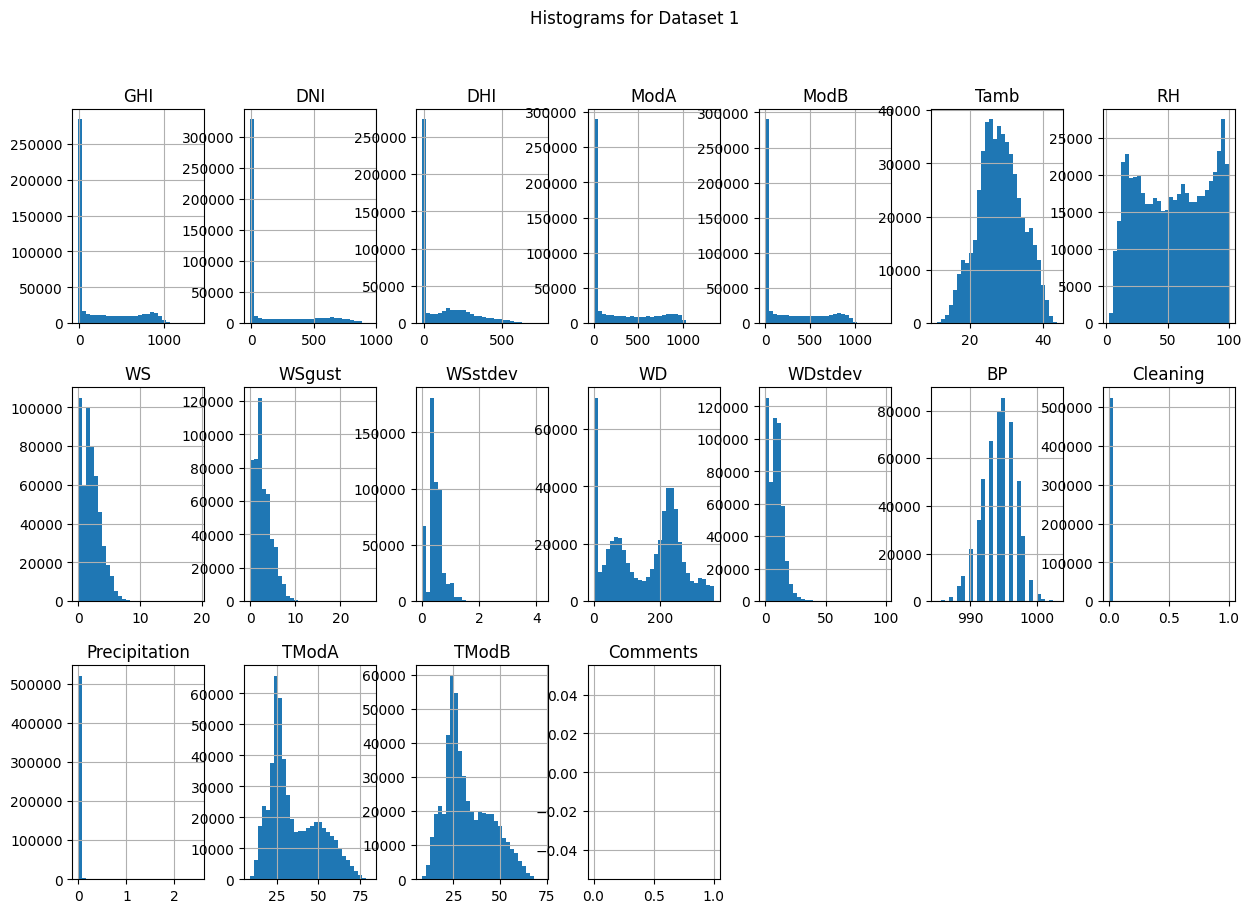

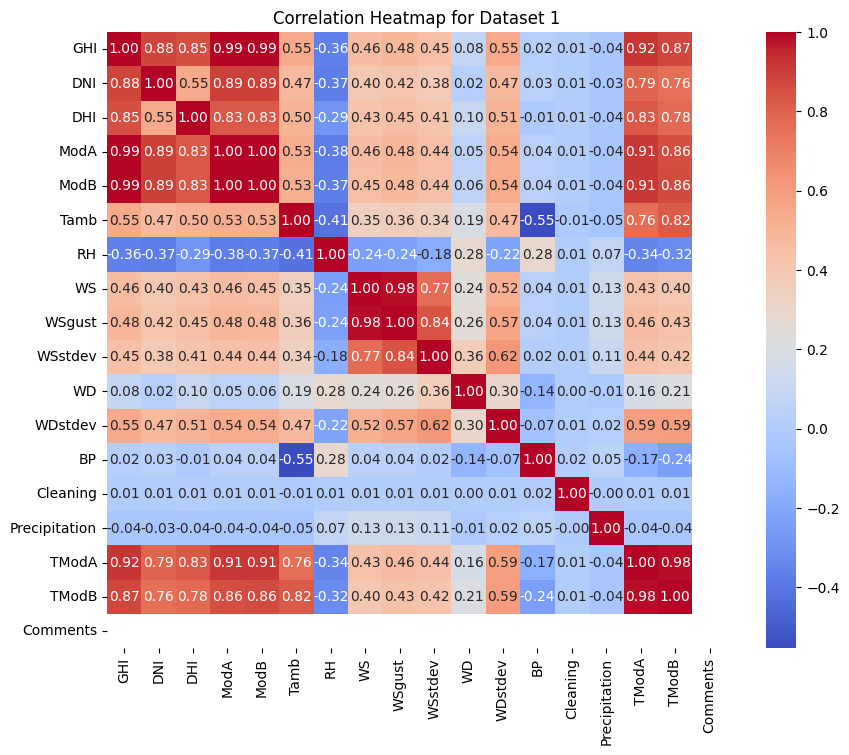

--- EDA for Dataset 2 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TMo

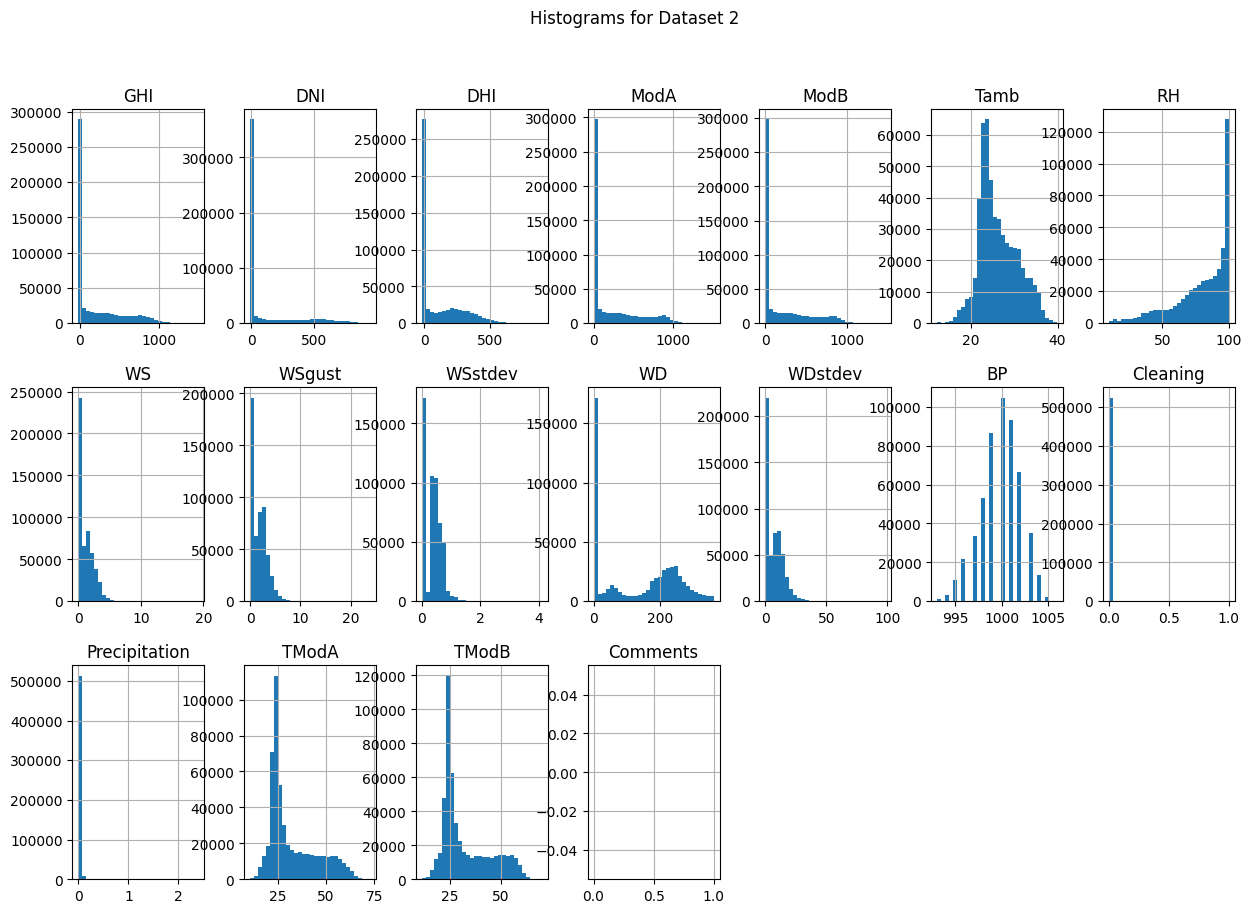

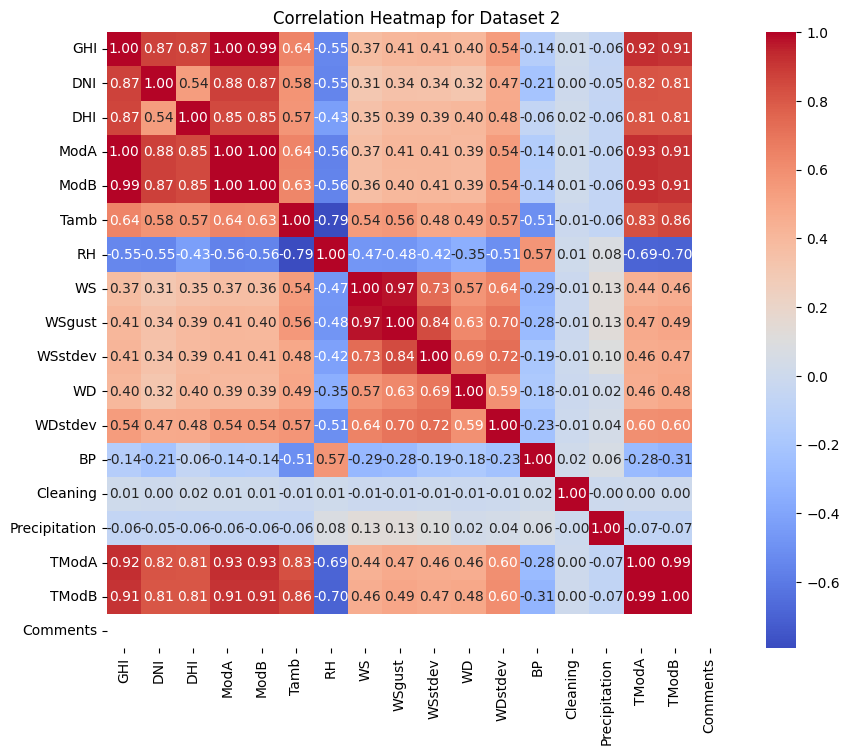

--- EDA for Dataset 3 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TMo

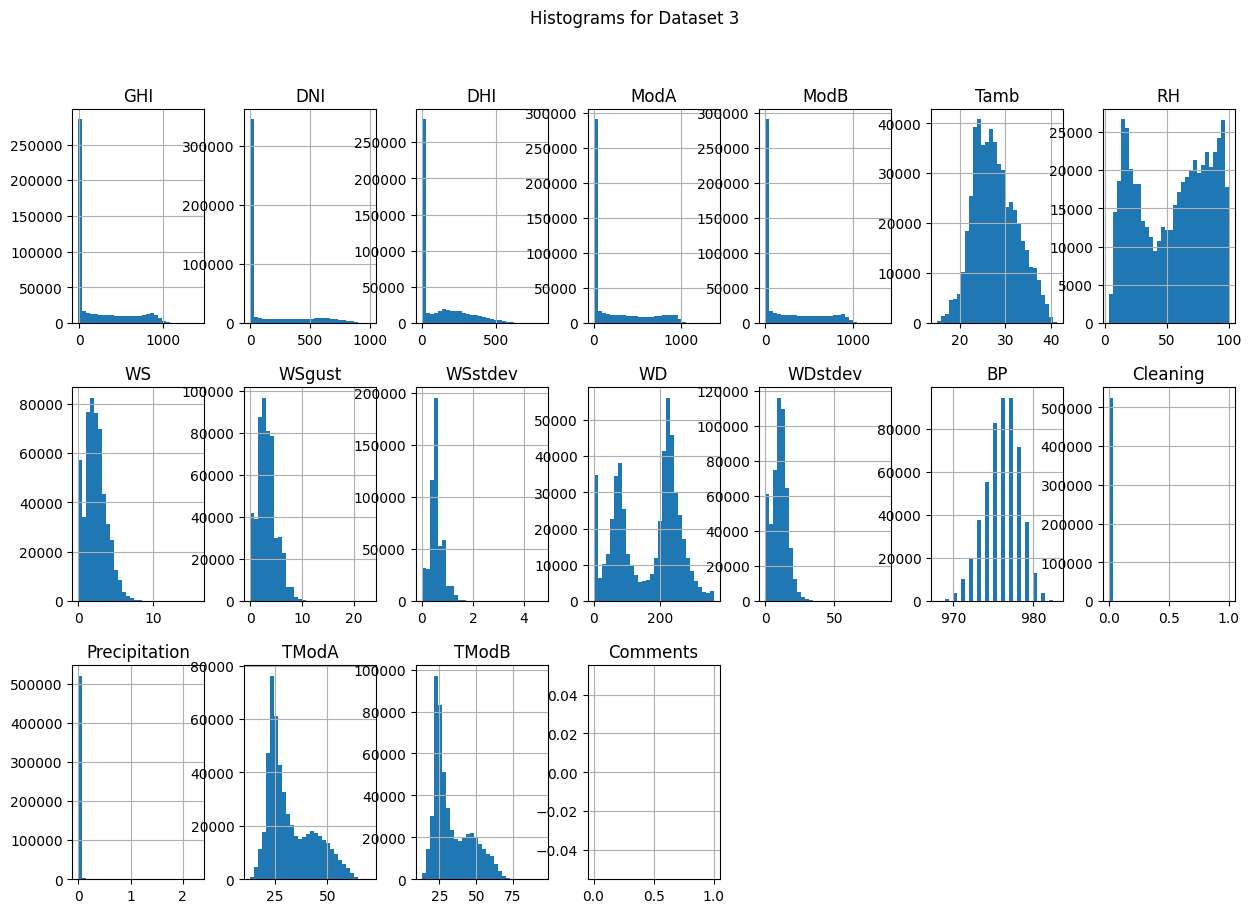

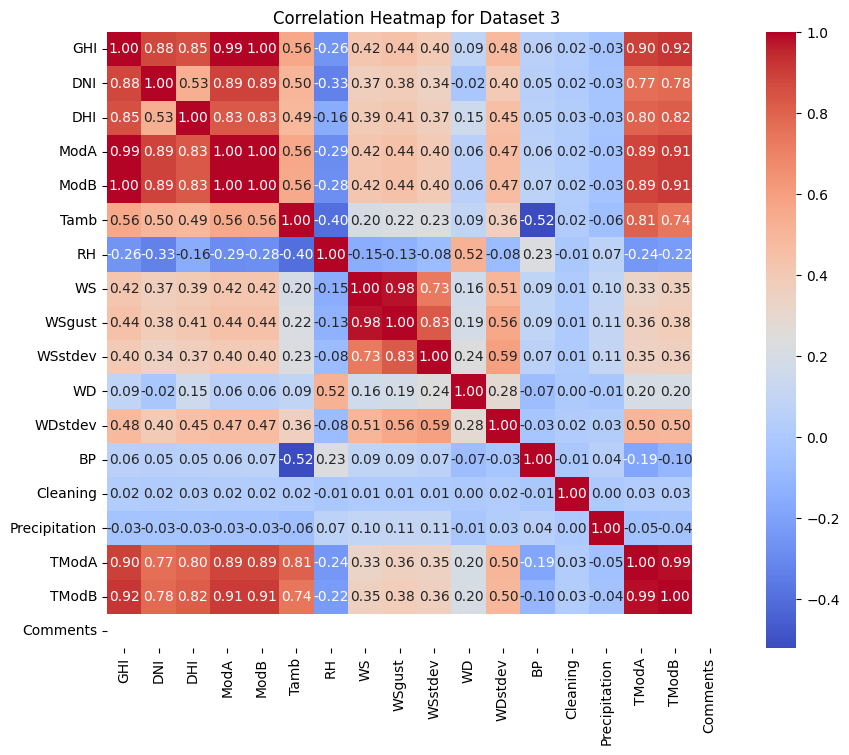

In [62]:
# Combine datasets into a list for iteration
datasets = [df1, df2, df3]

# Define a function for EDA
def eda(data, dataset_name):
    print(f'--- EDA for {dataset_name} ---')
    
    # Display basic info
    print(data.info())
    
    # Display first few rows
    print(data.head())
    
    # Summary statistics
    print(data.describe())
    
    # Check for missing values
    print('Missing values:')
    print(data.isnull().sum())
    
    # Histograms for numerical features
    numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numeric_cols].hist(bins=30, figsize=(15, 10), layout=(3, int(len(numeric_cols)/3)+1))
    plt.suptitle(f'Histograms for {dataset_name}')
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title(f'Correlation Heatmap for {dataset_name}')
    plt.show()

# Perform EDA for each dataset
edu_names = ['Dataset 1', 'Dataset 2', 'Dataset 3']
for dataset, name in zip(datasets, edu_names):
    eda(dataset, name)

In [63]:
# Add and commit changes
!git add .
!git commit -m "Description of changes made in task_1"


On branch task_1
nothing to commit, working tree clean


**Compare Categorical Variables Across DataFrames**

In [ ]:
# Cross-tabulation 
crosstab_df1_df2 = pd.crosstab(df1[cat_column], df2[cat_column], margins=True)
print(crosstab_df1_df2)

# Visualize the comparison
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab_df1_df2, annot=True, cmap='YlGnBu')
plt.title('Comparison of Categorical Variables between DF1 and DF2')
plt.show()

In [65]:
# Switch back to the main branch
!git checkout main

# Merge changes
!git merge task_1

# Push changes to a remote repository
!git remote add origin <10-Academy-AI-Mastery.ipynb 10-Academy-AI-Mastery-Week0 /notebooks/>
!git push origin main --force

error: pathspec 'main' did not match any file(s) known to git
Already up to date.
/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `git remote add origin <10-Academy-AI-Mastery.ipynb 10-Academy-AI-Mastery-Week0 /notebooks/>'
error: src refspec main does not match any
error: failed to push some refs to 'origin'
